Flower-17


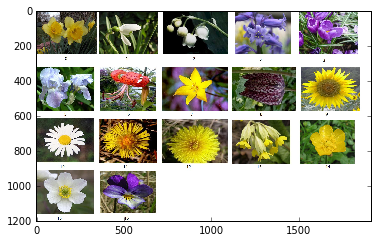

显示测试图片


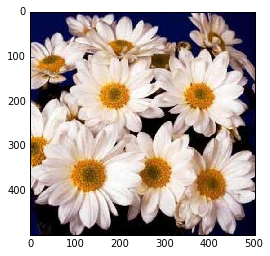

开始测试
[0.05993956699967384, 7.595780097659733e-23, 0.09841208904981613, 0.1425056904554367, 7.373744737159825e-16, 0.002151090418919921, 0.05672015994787216, 1.6254163556754773e-17, 0.007566466927528381, 0.09764856100082397, 0.07578814029693604, 0.08942347019910812, 0.002703274367377162, 0.05895319953560829, 0.09170636534690857, 0.000854920712299645, 0.2156270444393158]
Tensor("ArgMax:0", shape=(1,), dtype=int64)


In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
from __future__ import division, print_function, absolute_import

import tflearn
import tensorflow as tf
import numpy as np
import os
import skimage.io as io

from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d, avg_pool_2d
from tflearn.layers.normalization import local_response_normalization
#from tflearn.layers.merge_ops import merge
from tflearn.layers.estimator import regression


os.environ["CUDA_VISIBLE_DEVICES"] = "1"

network = input_data(shape=[None, 224, 224, 3])
network = conv_2d(network, 96, 11, strides=4, activation='relu')
network = max_pool_2d(network, 3, strides=2)
network = local_response_normalization(network)
network = conv_2d(network, 256, 5, activation='relu')
network = max_pool_2d(network, 3, strides=2)
network = local_response_normalization(network)
network = conv_2d(network, 384, 3, activation='relu')
network = conv_2d(network, 384, 3, activation='relu')
network = conv_2d(network, 256, 3, activation='relu')
network = max_pool_2d(network, 3, strides=2)
network = local_response_normalization(network)
network = fully_connected(network, 4096, activation='tanh')
network = dropout(network, 0.5)
network = fully_connected(network, 4096, activation='tanh')
network = dropout(network, 0.5)
loss = fully_connected(network, 17, activation='softmax')
network = regression(loss, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

model = tflearn.DNN(network, checkpoint_path='checkpoint',
                    max_checkpoints=1, tensorboard_verbose=2)
#model = tflearn.DNN(network)
model.load("alexnet.tfl")

#显示测试图片与原始图片
from PIL import Image
testImg=Image.open('test.jpg')
srcImg=Image.open('src.jpg')
print("Flower-17")
io.imshow(srcImg)
io.show()
print("显示测试图片")
io.imshow(testImg)
io.show()

def resize_image(in_image, new_width, new_height, out_image=None,
                 resize_mode=Image.ANTIALIAS):
    img = in_image.resize((new_width, new_height), resize_mode)
    if out_image:
        img.save(out_image)
    return img
testImg=resize_image(testImg, 224, 224)

def pil_to_nparray(pil_image):
    """ Convert a PIL.Image to numpy array. """
    pil_image.load()
    return np.asarray(pil_image, dtype="float32")

testImg=pil_to_nparray(testImg)

print(u'开始测试')
prediction = model.predict([testImg])
#print(prediction)
MAX=max(prediction)
print(MAX)
index=tf.argmax(prediction,1)
print(index)


